In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

In [3]:
df = pd.read_excel('/content/daily-data.xlsx')
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,DAYWISE MAXIMUM DELHI LOAD(MW),Unnamed: 4,Unnamed: 5,Unnamed: 6,HOURLY LOAD (MW),Unnamed: 8
0,NaN,NaN,NaN,DATE,MW,NaN,NaN,DATE,MW
1,NaN,NaN,NaN,1/1/2017 10:23:55 AM,3536.24,NaN,NaN,1/1/2017 12:00:00 AM,1815.57
2,NaN,NaN,NaN,1/2/2017 10:34:49 AM,3639.74,NaN,NaN,1/1/2017 1:00:00 AM,1576.7
3,NaN,NaN,NaN,1/3/2017 10:17:36 AM,3673.32,NaN,NaN,1/1/2017 2:00:00 AM,1428.97
4,NaN,NaN,NaN,1/4/2017 10:39:03 AM,3898.86,NaN,NaN,1/1/2017 3:00:00 AM,1356.27
...,...,...,...,...,...,...,...,...,...
35060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/31/2020 7:00:00 PM,3797.25
35061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/31/2020 8:00:00 PM,3576.34
35062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/31/2020 9:00:00 PM,3327.02
35063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/31/2020 10:00:00 PM,3059.24


In [4]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True) #set date as index
df.head()

KeyError: ignored

In [ ]:
df.columns

Index(['MW'], dtype='object')

Visualizing the time series

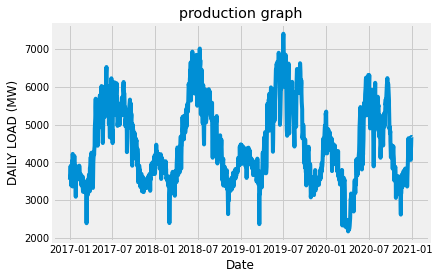

In [ ]:
plt.xlabel("Date")
plt.ylabel("DAILY LOAD (MW)")
plt.title("production graph")
plt.plot(df)

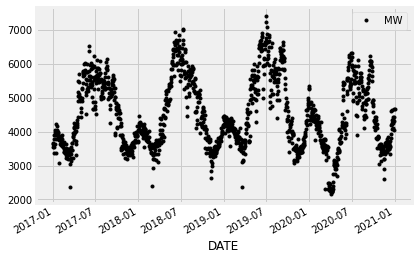

In [ ]:
df.plot(style='k.')
plt.show()

# Each month a seperate graph to understand the cyclic
# Each Year a seperate graph to understand the cyclic
# Extraction of all the isolated points (Technically it is called as outliers)

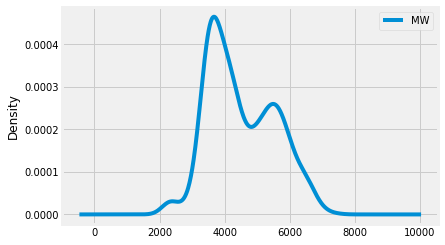

In [ ]:
df.plot(kind='kde')

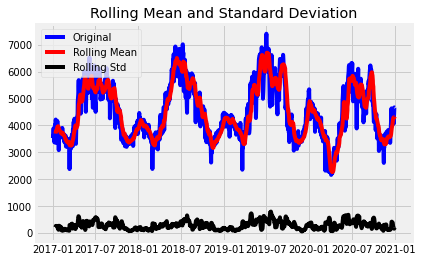

Results of dickey fuller test
Test Statistics                  -3.085619
p-value                           0.027636
No. of lags used                 21.000000
Number of observations used    1439.000000
critical value (1%)              -3.434902
critical value (5%)              -2.863551
critical value (10%)             -2.567840
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    #perform dickey fuller test  
    print("Results of dickey fuller test")
    adft = adfuller(timeseries['MW'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(df)

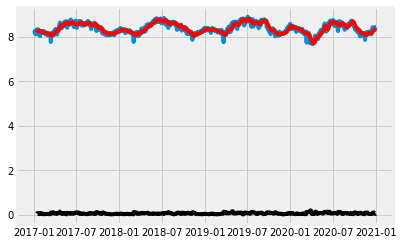

In [ ]:
df_log = np.log(df)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.plot(df_log)
plt.plot(moving_avg, color="red")
plt.plot(std_dev, color ="black")
plt.show()

In [ ]:
df_log_moving_avg_diff = df_log-moving_avg
df_log_moving_avg_diff.dropna(inplace=True)

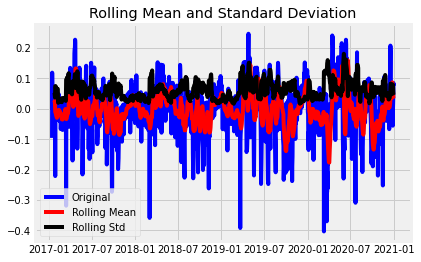

Results of dickey fuller test
Test Statistics               -6.536186e+00
p-value                        9.595872e-09
No. of lags used               2.100000e+01
Number of observations used    1.428000e+03
critical value (1%)           -3.434938e+00
critical value (5%)           -2.863566e+00
critical value (10%)          -2.567849e+00
dtype: float64


In [ ]:
test_stationarity(df_log_moving_avg_diff)

In [ ]:
weighted_average = df_log.ewm(halflife=12, min_periods=0,adjust=True).mean()

No handles with labels found to put in legend.


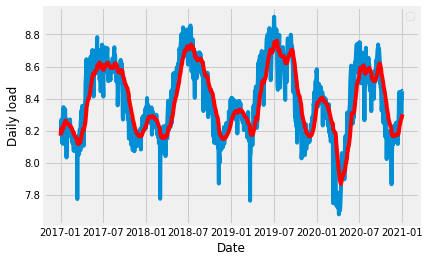

In [ ]:
plt.plot(df_log)
plt.plot(weighted_average, color='red')
plt.xlabel("Date")
plt.ylabel("Daily load")
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
plt.legend()
plt.show(block =False)

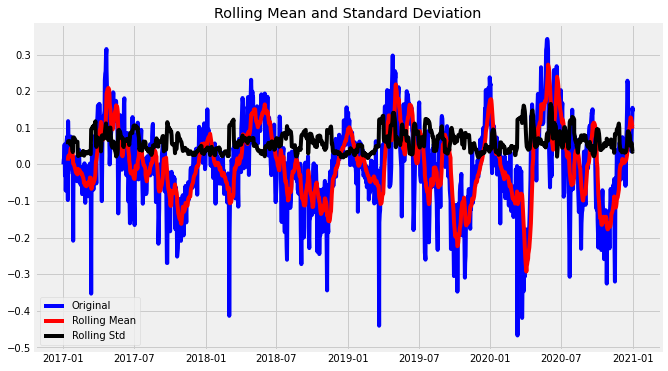

Results of dickey fuller test
Test Statistics                  -4.437212
p-value                           0.000255
No. of lags used                 21.000000
Number of observations used    1439.000000
critical value (1%)              -3.434902
critical value (5%)              -2.863551
critical value (10%)             -2.567840
dtype: float64


In [ ]:
logScale_weightedMean = df_log-weighted_average
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
test_stationarity(logScale_weightedMean)

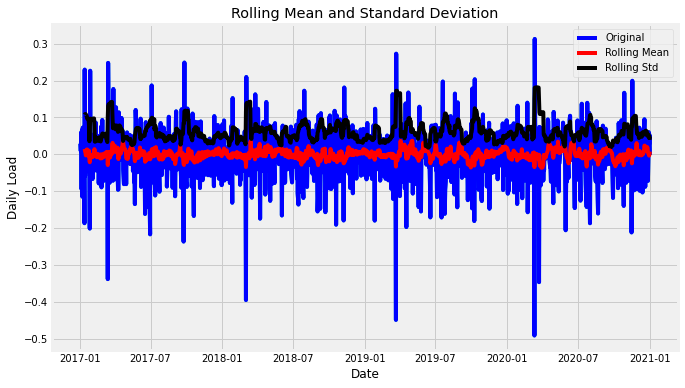

Results of dickey fuller test
Test Statistics               -8.239498e+00
p-value                        5.768279e-13
No. of lags used               2.000000e+01
Number of observations used    1.439000e+03
critical value (1%)           -3.434902e+00
critical value (5%)           -2.863551e+00
critical value (10%)          -2.567840e+00
dtype: float64


In [ ]:
df_log_diff = df_log - df_log.shift()
plt.title("Shifted timeseries")
plt.xlabel("Date")
plt.ylabel("Daily Load")
plt.plot(df_log_diff)

#Let us test the stationarity of our resultant series
df_log_diff.dropna(inplace=True)
test_stationarity(df_log_diff)

In [ ]:
!pip install chart_studio

     |████████████████████████████████| 71kB 3.2MB/s 


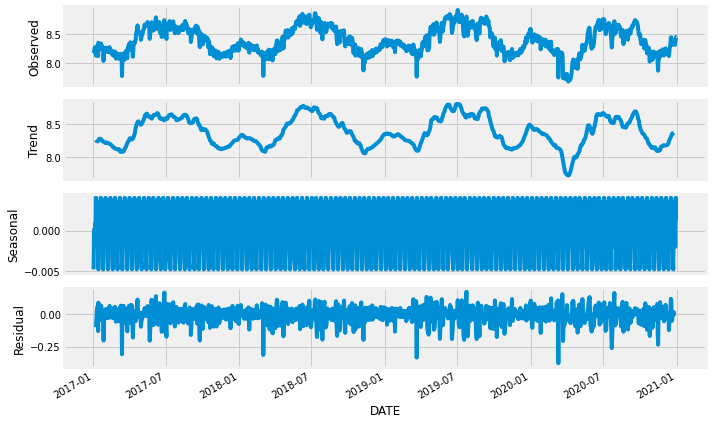

In [ ]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_log, model='additive', freq = 12)
result.plot()
plt.show()

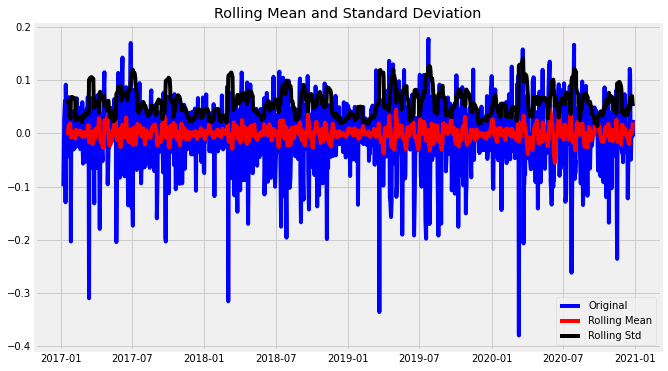

In [ ]:
def test_stationarity_final(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)



trend = result.trend
trend.dropna(inplace=True)
seasonality = result.seasonal
seasonality.dropna(inplace=True)
residual = result.resid
residual.dropna(inplace=True)
test_stationarity_final(residual)

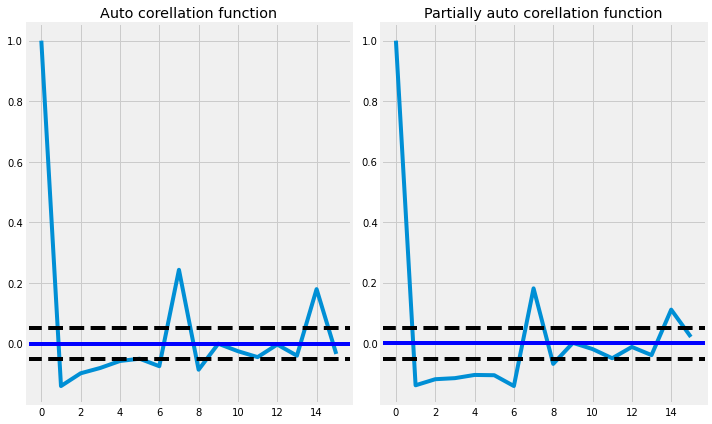

In [ ]:
from statsmodels.tsa.stattools import acf,pacf
# we use d value here(data_log_shift)
acf = acf(df_log_diff, nlags=15)
pacf= pacf(df_log_diff, nlags=15,method='ols')#plot PACF
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()#plot ACF
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()

Fitting model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


RSS : 5.746063


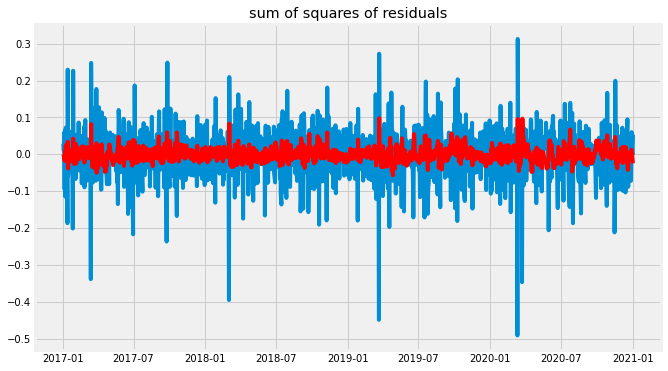

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_log, order=(3,1,3))
result_AR = model.fit(disp = 0)
plt.plot(df_log_diff)
plt.plot(result_AR.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((result_AR.fittedvalues-df_log_diff["MW"])**2))

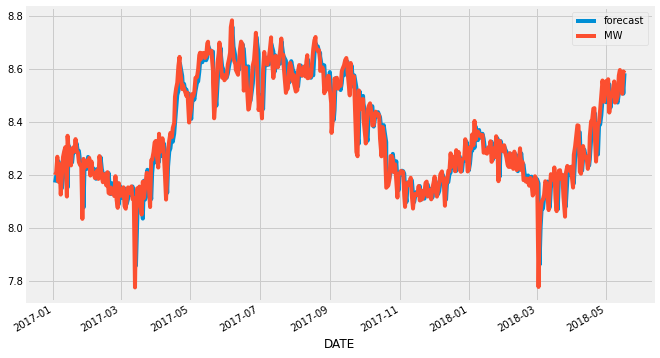

In [ ]:
result_AR.plot_predict(1,500)
x=result_AR.forecast(steps=300)

LSTM

RNN

All these models are for the purpose of prediction  

Introduction
Literature Survey 
Indian Dataset for this STLF
Next meet May 2nd

# Model-2

In [ ]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Bidirectional, Dense,Dropout,LSTM,Activation, RepeatVector, SimpleRNN
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from datetime import datetime
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('/content/daily-data.xlsx')
df.head()

,DATE,MW
0,1/1/2017 10:23:55 AM,3536.238770
1,1/2/2017 10:34:49 AM,3639.738770
2,1/3/2017 10:17:36 AM,3673.321289
3,1/4/2017 10:39:03 AM,3898.860840
4,1/5/2017 10:03:41 AM,3547.965820


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
#df.set_index('DATE', inplace=True) #set date as index
df.head()

,DATE,MW
0,2017-01-01 10:23:55,3536.238770
1,2017-01-02 10:34:49,3639.738770
2,2017-01-03 10:17:36,3673.321289
3,2017-01-04 10:39:03,3898.860840
4,2017-01-05 10:03:41,3547.965820


In [ ]:
# perform mean min-max normalization 

dataset = df.MW.values.reshape(-1,1)

sclar = MinMaxScaler(feature_range=(0,1))
dataset = sclar.fit_transform(dataset)
dataset.shape

(1461, 1)

In [ ]:
def load_data(dataset, seq_len):
    X_train = []
    y_train = []
    for i in range(seq_len, len(dataset)):
        X_train.append(dataset[i - seq_len: i, 0])
        y_train.append(dataset[i, 0])

    # last year i.e. 2020 data is used for testing
    X_test = X_train[1095::]
    y_test = y_train[1095::]

    # remaining data is used for training.
    X_train = X_train[::1095]
    y_train = y_train[::1095]

    # convert to numpy array
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_test = np.array(X_test)
    y_test = np.array(y_test)

    return [X_train, y_train, X_test, y_test]

In [ ]:
seq_len = 20 #choose sequence length

X_train, y_train, X_test, y_test = load_data(dataset, seq_len)

X_train = X_train.reshape(X_train.shape[0], seq_len, 1)
X_test = X_test.reshape(X_test.shape[0], seq_len, 1)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2, 20, 1), (346, 20, 1), (2,), (346,))

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Bidirectional(LSTM(40, return_sequences=True, input_shape=(X_train.shape[1],1))))
model.add(Bidirectional(LSTM(20,return_sequences= False, activation= 'linear')))
model.add(tf.keras.layers.Dropout(0.5))

model.add(Dense(1))
# model.add(layers.LSTM(256))

model.compile(loss='MSE', optimizer = 'adam')
hist = model.fit(X_train, y_train, epochs=10, validation_split=0.3, batch_size=1000)
model.summary()

Epoch 1/10
1/1 [==============================] - 11s 11s/step - loss: 0.1318 - val_loss: 0.1347
Epoch 2/10
1/1 [==============================] - 0s 83ms/step - loss: 0.0595 - val_loss: 0.0998
Epoch 3/10
1/1 [==============================] - 0s 88ms/step - loss: 0.0587 - val_loss: 0.0689
Epoch 4/10
1/1 [==============================] - 0s 90ms/step - loss: 0.0385 - val_loss: 0.0436
Epoch 5/10
1/1 [==============================] - 0s 83ms/step - loss: 0.0395 - val_loss: 0.0239
Epoch 6/10
1/1 [==============================] - 0s 99ms/step - loss: 0.0148 - val_loss: 0.0097
Epoch 7/10
1/1 [==============================] - 0s 120ms/step - loss: 0.0044 - val_loss: 0.0019
Epoch 8/10
1/1 [==============================] - 0s 90ms/step - loss: 0.0016 - val_loss: 1.4524e-04
Epoch 9/10
1/1 [==============================] - 0s 89ms/step - loss: 3.2485e-04 - val_loss: 0.0043
Epoch 10/10
1/1 [==============================] - 0s 82ms/step - loss: 0.0303 - val_loss: 0.0075
Model: "sequential"


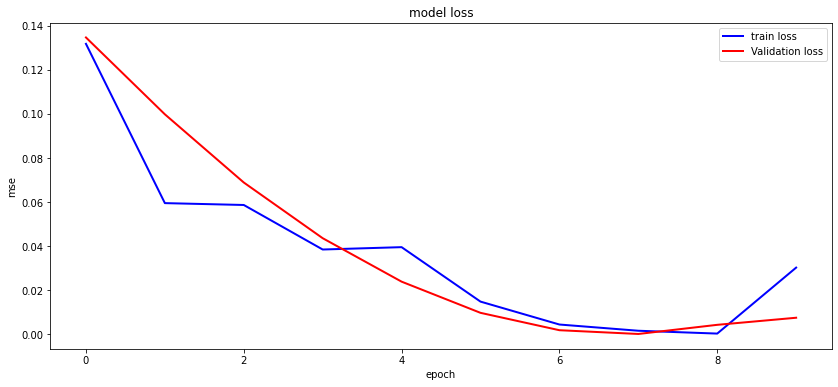

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,6))
ax.plot(hist.history['loss'], 'b' ,label = 'train loss', linewidth=2)
ax.plot(hist.history['val_loss'], 'r', label ='Validation loss', linewidth=2)
ax.set_title('model loss')
ax.set_ylabel('mse')
ax.set_xlabel('epoch')
ax.legend()
plt.show()

In [ ]:
pred = model.predict(X_test)

mse = mean_squared_error(y_test, pred)
print("mean sequare error = ",mse)

mean sequare error =  0.01716073385938192


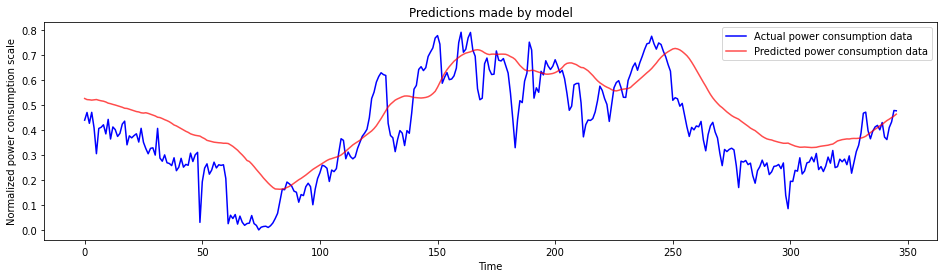

In [ ]:
def plot_predictions(test, predicted, title):
    plt.figure(figsize=(16, 4))
    plt.plot(test, color='blue', label='Actual power consumption data')
    plt.plot(predicted, alpha=0.7, color='red', label='Predicted power consumption data')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized power consumption scale')
    plt.legend()
    plt.show()


plot_predictions(y_test, pred, "Predictions made by model")

# Model-3

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score

from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [ ]:
df = pd.read_excel('/content/daily-data.xlsx')
df.head()

,DATE,MW
0,1/1/2017 10:23:55 AM,3536.238770
1,1/2/2017 10:34:49 AM,3639.738770
2,1/3/2017 10:17:36 AM,3673.321289
3,1/4/2017 10:39:03 AM,3898.860840
4,1/5/2017 10:03:41 AM,3547.965820


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
#df.set_index('DATE', inplace=True) #set date as index
df.head()

,DATE,MW
0,2017-01-01 10:23:55,3536.238770
1,2017-01-02 10:34:49,3639.738770
2,2017-01-03 10:17:36,3673.321289
3,2017-01-04 10:39:03,3898.860840
4,2017-01-05 10:03:41,3547.965820


In [ ]:
def load_data(dataset, seq_len):
    X_train = []
    y_train = []
    for i in range(seq_len, len(dataset)):
        X_train.append(dataset[i - seq_len: i, 0])
        y_train.append(dataset[i, 0])

    # last year i.e. 2020 data is used for testing
    X_test = X_train[1095::]
    y_test = y_train[1095::]

    # remaining data is used for training.
    X_train = X_train[::1095]
    y_train = y_train[::1095]

    # convert to numpy array
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_test = np.array(X_test)
    y_test = np.array(y_test)

    return [X_train, y_train, X_test, y_test]


seq_len = 20 #choose sequence length

X_train, y_train, X_test, y_test = load_data(dataset, seq_len)

X_train = X_train.reshape(X_train.shape[0], seq_len, 1)
X_test = X_test.reshape(X_test.shape[0], seq_len, 1)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2, 20, 1), (346, 20, 1), (2,), (346,))

In [ ]:
# build LSTM model
lstm_model = Sequential()

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=True))
lstm_model.add(Dropout(0.15))

lstm_model.add(LSTM(40,activation="tanh",return_sequences=False))
lstm_model.add(Dropout(0.15))

lstm_model.add(Dense(1))

lstm_model.summary()

# train LSTM model
lstm_model.compile(optimizer="adam",loss="MSE")
lstm_model.fit(X_train, y_train, epochs=10, batch_size=1000)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 40)            6720      
_________________________________________________________________
dropout (Dropout)            (None, 20, 40)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 40)            12960     
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 40)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 40)                12960     
_________________________________________________________________
dropout_2 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 4

In [ ]:
lstm_predictions = lstm_model.predict(X_test)

lstm_score = r2_score(y_test, lstm_predictions)
print("R^2 Score of LSTM model = ",lstm_score)

R^2 Score of LSTM model =  0.0734934459703056


In [ ]:
def plot_predictions(test, predicted, title):
    plt.figure(figsize=(16,4))
    plt.plot(test, color='blue',label='Actual power consumption data')
    plt.plot(predicted, alpha=0.7, color='orange',label='Predicted power consumption data')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized power consumption scale')
    plt.legend()
    plt.show()

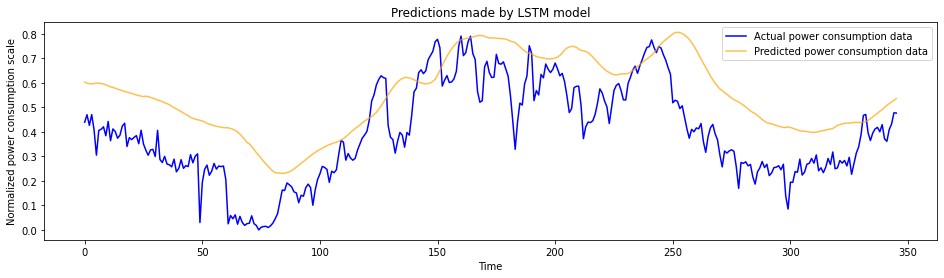

In [ ]:
plot_predictions(y_test, lstm_predictions, "Predictions made by LSTM model")